In [1]:
# February 14st, 2020
# Government patents

In [2]:
import pandas as pd
import numpy as np
# import itertools
import seaborn as sns
# import networkx as nx
# import csv
# from graphviz import Digraph
# import igraph
import matplotlib.pyplot as plt
# import datetime


# import sys
# sys.path.append('/home/rkogeyam/scripts/')
# sys.path.append('scripts/')

# from determinants_scripts import classes, dtypes

In [20]:
contract='data/patent_contractawardnumber.tsv'
pat_gov='data/patent_govintorg.tsv'
gov_org='data/government_organization.tsv'

# df_contract=pd.read_csv(contract, sep='\t', chunksize=1000)
# df_pat_govt=pd.read_csv(pat_gov,  sep='\t', chunksize=1000)
# df_gov_org=pd.read_csv(gov_org,  sep='\t', chunksize=1000)
df_contract=pd.read_csv(contract, sep='\t')
df_pat_govt=pd.read_csv(pat_gov,  sep='\t')
df_gov_org=pd.read_csv(gov_org,  sep='\t')

df_class=pd.read_csv('data/wipo.csv')

In [4]:
patent='data/cleanpatent.csv'
usecols=['id', 'date', 'kind']
# df_pat=pd.read_csv(patent, chunksize=100000, usecols=usecols)
df_pat=pd.read_csv(patent, usecols=usecols, parse_dates=['date'] )

/home/applications/anaconda3/4.2.0/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
%matplotlib inline
sns.set()
%config InlineBackend.figure_format = 'retina'

In [6]:
df=df_pat_govt.groupby('patent_id').count()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143415 entries, 10000026 to RE47622
Data columns (total 1 columns):
organization_id    143415 non-null int64
dtypes: int64(1)
memory usage: 2.2+ MB


In [8]:
df_pat.describe()

,id,date,kind
count,6488256,6488256,6488253
unique,6488256,2218,15
top,9728756,2017-04-18 00:00:00,B2
freq,1,7602,2920417
first,NaN,1976-01-06 00:00:00,NaN
last,NaN,2017-12-26 00:00:00,NaN


In [9]:
df=df.merge(df_pat, left_index=True, right_on='id', how='inner')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6933 entries, 5636173 to 6488196
Data columns (total 4 columns):
organization_id    6933 non-null int64
id                 6933 non-null object
date               6933 non-null datetime64[ns]
kind               6933 non-null object
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 270.8+ KB


In [11]:
df_pat.groupby(pd.Grouper(key='date', freq="A")).count()

,id,kind
date,,
1976-12-31,70941,70941
1977-12-31,69820,69820
1978-12-31,70586,70586
1979-12-31,52484,52484
1980-12-31,66212,66212
1981-12-31,71112,71112
1982-12-31,63292,63292
1983-12-31,62019,62019
1984-12-31,72689,72689


/home/applications/anaconda3/4.2.0/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


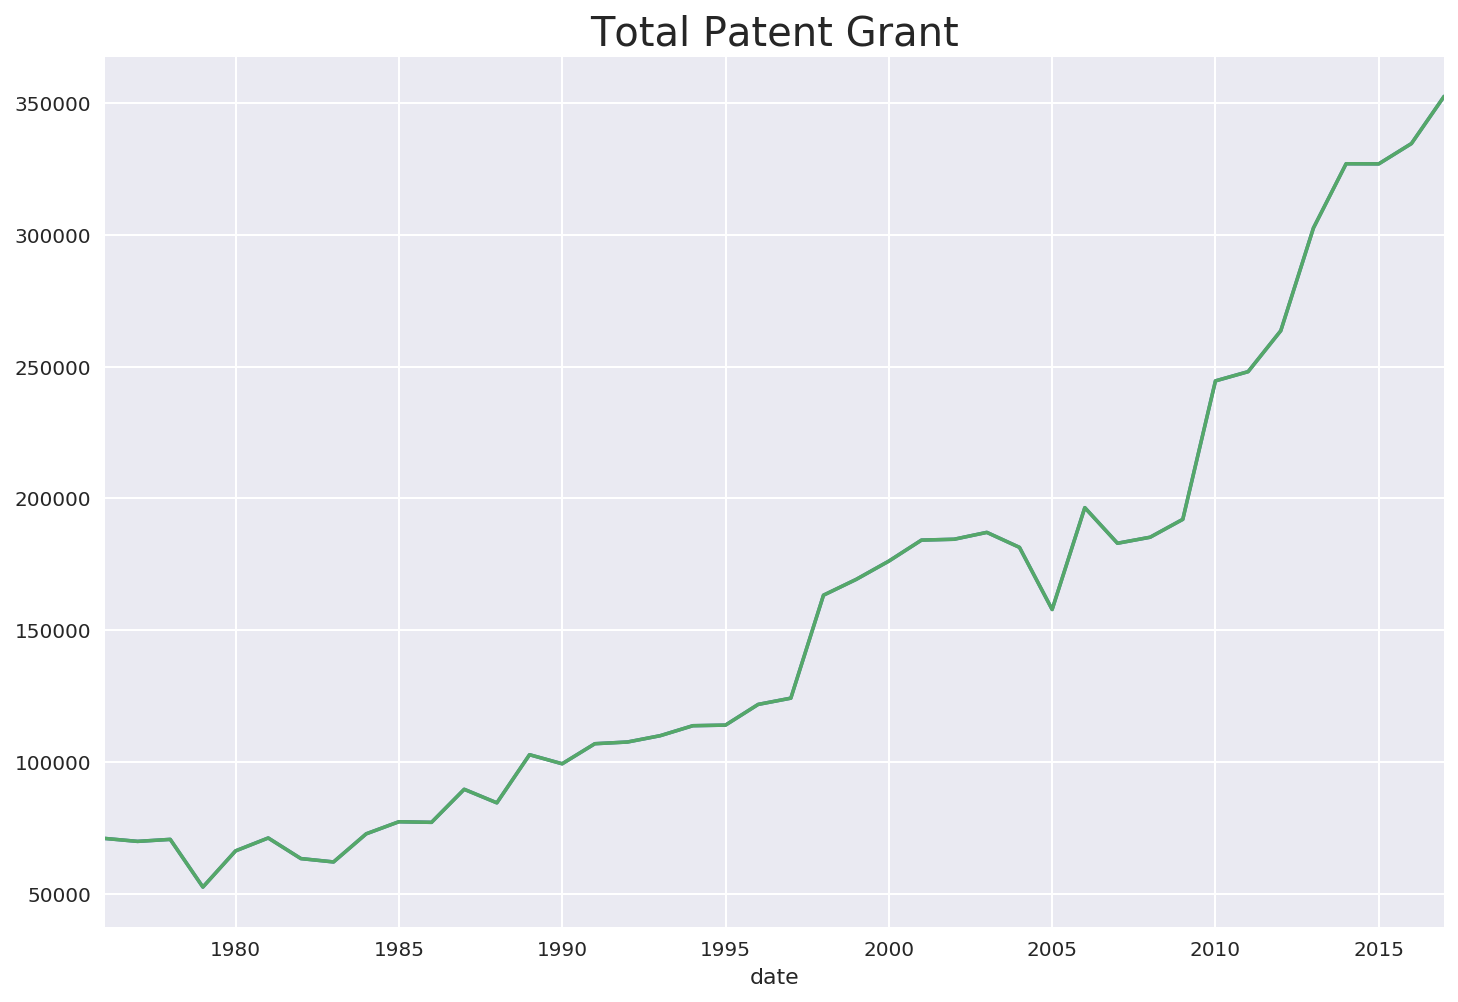

In [12]:
fig, ax=plt.subplots(figsize=(12,8))
df_pat.groupby(pd.Grouper(key='date', freq="A")).count().plot(ax=ax)
ax.set_title('Total Patent Grant', fontsize=20)
plt.legend('')

In [21]:
df=df.merge(df_class, left_index=True, right_on='id')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6866 entries, 1516746 to 3008841
Data columns (total 8 columns):
id                 6866 non-null int64
organization_id    6866 non-null int64
id_x               6866 non-null object
date               6866 non-null datetime64[ns]
kind               6866 non-null object
id_y               6866 non-null int64
wipo_sector_id     6866 non-null int64
wipo_field_id      6866 non-null int64
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 482.8+ KB


In [23]:
df.groupby(pd.Grouper(key='date', freq="A")).count()

,id,organization_id,id_x,kind,id_y,wipo_sector_id,wipo_field_id
date,,,,,,,
1976-12-31,3,3,3,3,3,3,3
1977-12-31,1,1,1,1,1,1,1
1978-12-31,2,2,2,2,2,2,2
1979-12-31,5,5,5,5,5,5,5
1980-12-31,2,2,2,2,2,2,2
1981-12-31,3,3,3,3,3,3,3
1982-12-31,5,5,5,5,5,5,5
1983-12-31,5,5,5,5,5,5,5
1984-12-31,3,3,3,3,3,3,3


In [24]:
df[df['date'].dt.year==2017].groupby('wipo_sector_id').count()

,id,organization_id,id_x,date,kind,id_y,wipo_field_id
wipo_sector_id,,,,,,,
0,1207,1207,1207,1207,1207,1207,1207
1,1720,1720,1720,1720,1720,1720,1720
2,955,955,955,955,955,955,955
3,1243,1243,1243,1243,1243,1243,1243
4,503,503,503,503,503,503,503
